In [4]:
# TODO: https://stackoverflow.com/questions/51520189/zero-occurrences-frequency-using-value-counts-in-pandas

# Plotting

from typing import Tuple
import pandas as pd
from pandas.testing import assert_series_equal
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from seaborn import FacetGrid
from matplotlib.figure import Figure
from matplotlib.axes import Axes

# sns.color_palette("Blues")
# sns.set_theme('whitegrid')

sns.set_style('whitegrid')
mpl.rcParams['figure.dpi'] = 144
plt.rcParams['font.family'] = 'Hiragino Sans'
plt.rcParams["figure.figsize"] = (4, 1)


percent_locator = ticker.MaxNLocator(10, steps=[1, 2, 2.5, 5, 10])

# 縦棒
def vbar(data_series: pd.Series, n: int, title: str, description: str = ''):
    grid: FacetGrid = sns.catplot(data=data_series.to_frame().transpose(), kind='bar', orient='v', color='#1C4587', width=0.5, height=5, aspect=16/9)
    figure: Figure = grid.figure
    ax = figure.axes[0]
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())
    ax.yaxis.set_major_locator(percent_locator)
    ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=4)
    figure.suptitle(title)
    figure.subplots_adjust(top=0.9, right=0.9)
    figure.text(0.98, 0.12, f"N={n}", ha='right')
    if description:
        figure.text(0.03, -0.02, description, ha='left', va='top')    

# 横棒
def hbar(data_series: pd.Series, n: int, title: str, description: str = ''):
    grid: FacetGrid = sns.catplot(data=data_series.to_frame().transpose(), kind='bar', orient='h', color='#1C4587', width=0.5, height=5, aspect=16/9)
    figure: Figure = grid.figure
    ax = figure.axes[0]
    ax.xaxis.set_major_formatter(ticker.PercentFormatter())
    ax.xaxis.set_major_locator(percent_locator)
    ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=4)
    figure.suptitle(title)
    figure.subplots_adjust(top=0.9, right=0.9)
    figure.text(0.98, 0.12, f"N={n}", ha='right')
    if description:
        figure.text(0.03, -0.02, description, ha='left', va='top')    

# NOTE: list() will be loaded as np.array()
df = pd.read_feather('out/after_coded.feather')
df.set_index('回答番号', inplace=True)
questions = pd.read_csv('./config/questions.csv', index_col=0).squeeze()

# Setup choices_df
# choices_df contains multiple candidates of choice indexed by column name
choices_df = pd.read_csv('./config/choices.csv')
col_names = questions.index.to_series()
assert_series_equal(choices_df['設問文章'], questions[questions != "タイムスタンプ"], check_names=False, check_index=False)
choices_df.index = col_names.drop(index=questions[questions == "タイムスタンプ"].index).values
choices_df['選択肢'] = choices_df['選択肢'].str.split(',')

for col in choices_df[choices_df['複数回答'] == 1].index:
    df[col] = df[col].map(lambda x: x.tolist())

# 表
# 横積み上げ


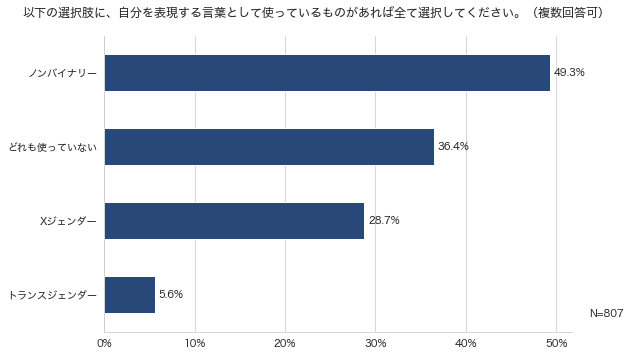

In [6]:
# 横棒
answers = df['P'][df['P'].astype(bool)] # drop empty list
n = len(answers)

answers_counts = answers.explode().value_counts() * 100 / n

hbar(answers_counts, n, questions.loc['P'])

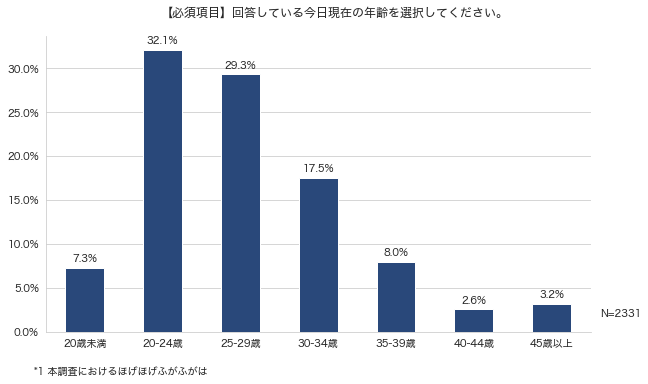

In [7]:
# 縦棒

ages = df['D'].dropna()
n = len(ages)

ages_bin = pd.cut(ages, [-1, 20, 25, 30, 35, 40, 45, 10000], labels=['20歳未満', '20-24歳', '25-29歳', '30-34歳', '35-39歳', '40-44歳', '45歳以上'], right=False)

ages_bin_count = ages_bin.value_counts(sort=False) * 100 / n

vbar(ages_bin_count, n, questions.loc['D'], description="*1 本調査におけるほげほげふがふがは")

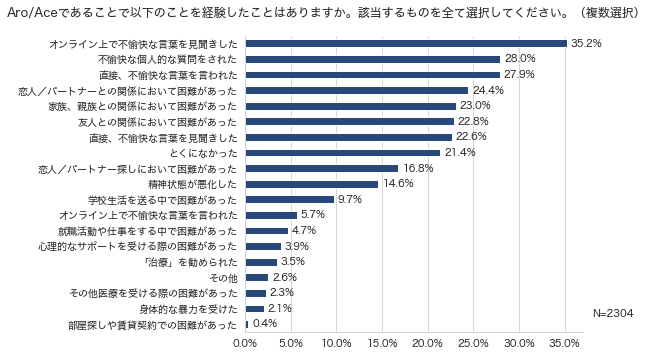

In [8]:
answers = df['CO'][df['CO'].astype(bool)]  # drop empty list
n = len(answers)

answers_counts = answers.explode().value_counts() * 100 / n

hbar(answers_counts, n, questions.loc['CO'])


                         Y        S     percent
0                      その他     ややある   32.631579
1                      その他       ある   27.894737
2                      その他    あまりない   20.000000
3                      その他       ない   15.263158
4                      その他  どちらでもない    4.210526
5                 アロマンティック       ない   42.151163
6                 アロマンティック    あまりない   23.158915
7                 アロマンティック     ややある   19.089147
8                 アロマンティック       ある   11.046512
9                 アロマンティック  どちらでもない    4.554264
10                クエスチョニング     ややある   32.126697
11                クエスチョニング       ある   23.076923
12                クエスチョニング    あまりない   22.171946
13                クエスチョニング       ない   16.742081
14                クエスチョニング  どちらでもない    5.882353
15  グレイアロマンティック/グレイロマンティック     ややある   34.653465
16  グレイアロマンティック/グレイロマンティック    あまりない   26.237624
17  グレイアロマンティック/グレイロマンティック       ある   17.326733
18  グレイアロマンティック/グレイロマンティック       ない   13.861386
19  グレイアロマンティック/グレイロマンティック  どちらでもない    7

Text(0.98, 0.12, 'N=2331')

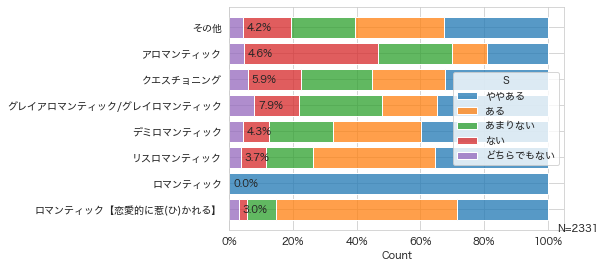

In [81]:
# 二次元

groups = df['S'].groupby(df['Y'])
counts = groups.value_counts(normalize=True).rename('count').unstack(fill_value=0).unstack(fill_value=0)
# print(counts)


# print(df.groupby('Y')['S']
#     .value_counts(normalize=True))

counts = (df.groupby('Y')['S']
    .value_counts(normalize=True)
    .mul(100)
    .rename('percent')
    .reset_index()
    # .to_frame()
    # .unstack(fill_value=0)
    # .unstack(fill_value=0)
    )
print(counts)


# grid: FacetGrid = sns.histplot(data=counts, x='percent', y='Y', hue='S', kind='bar', orient='h', multiple = 'stack', color='#1C4587', width=0.5, height=5, aspect=16/9)

grid: FacetGrid = sns.histplot(
    data=counts, y='Y', hue='S', weights='percent',
    multiple='stack', shrink=0.8, discrete=True,
)


figure: Figure = grid.figure
ax = figure.axes[0]
ax.set_ylabel('')
ax.get_legend().set_label('')
ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.xaxis.set_major_locator(percent_locator)
ax.bar_label(ax.containers[0], fmt='%.1f%%', padding=4)
figure.subplots_adjust(top=0.9, right=0.9)
figure.text(0.98, 0.12, f"N={n}", ha='right')
